# Using Globular Clusters to Estimate the Age of the Universe
 
#### Authors: Daniella Morrone and Aryanna Schiebelbein
#### Editors: Simran Nerval, Yilun Guan



### Objectives
*   Use real astronomical data to determine the age of a globular cluster
*   Use this age as a lower limit on the age of the universe
* Understand why globular clusters are an ideal tool for this



### Introduction
---
---
<div>
<img src="https://cdn.spacetelescope.org/archives/images/screen/potw1449a.jpg" width="500"/>
</div>

**Figure (1)**. Hubble image of the globular cluster Messier 92. This cluster is one of the oldest and brightest clusters in the Milky Way and is actually visible to the naked eye in ideal conditions.
(Source: [ESA/Hubble](https://esahubble.org/images/potw1449a/ ))
---
---

Globular clusters are dense, spherical collections of up to millions of stars that are all bound together by gravity. These are some of the oldest stars in the universe and therefore must have formed a long time ago.

These collections of stars are incredibly useful to astronomers. It can be assumed that all the stars in a cluster formed at around the same time. Stars form when gigantic clouds of molecular gas (clouds that are cool enough that they are mostly made of molecules as opposed to ions) condense gravitationally, so all of the stars in a globular cluster formed from the same gas at around the same time. These stars were not all identical though, having different masses. Thus we can use this collection of similar aged stars to see how different stars evolve!

As you will learn in this activity, we can use the evolution of stars in a globular cluster to figure out the age of the cluster. You will do this for your choice of globular cluster and thus put a lower limit on the age of the universe!

Source: [ESA/Hubble]( https://esahubble.org/wordbank/globular-cluster/#:~:text=Globular%20clusters%20are%20stable%2C%20tightly,and%20are%20tightly%20gravitationally%20bound. )

### Getting Data

We will be using data from the Gaia mission. This spacecraft launched in 2013 and one of its main objectives is to chart a 3D map of the sky, meaning it precisely measures where stars are on the sky and also determines how far away they are.

---
---

<div>
<img src="https://solarsystem.nasa.gov/rails/active_storage/blobs/redirect/eyJfcmFpbHMiOnsibWVzc2FnZSI6IkJBaHBBbE03IiwiZXhwIjpudWxsLCJwdXIiOiJibG9iX2lkIn19--d3d1efe13bdf454970202160527a06154cc93406/Gaia_mapping_the_stars_of_the_Milky_Way-900x597.jpg?disposition=inline" width="400"/>
</div>

**Figure (2)**. An artist's rendition of the Gaia spacecraft.
(Source: [ESA](https://solarsystem.nasa.gov/missions/gaia/in-depth/))
---
---
It uses the concept of parallax to determine distance to stars in our galaxy. Parallax uses only simple trigonometry! It is just the fact that an object looks displaced when it is viewed from a different point of view. To show this to yourself, hold your thumb out at arms length and look at it through only one eye. Then switch eyes, and the postion of your thumb changes. That angle over which is changes is parallax! This exact same concept is used in the solar system as you can see in the below figure.

---
---

<div>
<img src="https://cdn.mos.cms.futurecdn.net/se4zHDiwnrQn5zHttUAAbK-1920-80.jpg.webp" width="700"/>
</div>

**Figure (3)**. An illustration of how parallax can determine distances to distant stars. An astronomical unit is the average distance from the Earth to the Sun and is about 150 million km.

(Source: ESA)
---
---

Recall from your math classes that the triangles shown above can be described by the equation

$$\tan{p} = \frac{\text{opposite}}{\text{adjacent}} = \frac{1 AU}{d}$$

where $p$ is the parallax angle, $1 AU$ is the distance between the Earth and Sun, and $d$ is the distance to another star that we want to know. Note that as per Figure 3, the "opposite" line is the distance between the Earth and the Sun ($1 AU$), and the "adjacent" line is the dashed line between the Sun and the star.

Using this formula, we can measure the parallax after the Earth does half a rotation around the sun, since this gives the most different points of view to the distant star, and we know what 1 AU is, so we can solve for d!

Gaia also measure a lot of other things, such as how bright stars look in different wavelengths and proper motions which is how fast stars look like they are moving across the sky which can be seen after many years of observations.

Source: [Gaia](https://sci.esa.int/web/gaia)

You are going to use real data from Gaia to estimate the age of a globular cluster, and therefore the age of the universe.

Below is a short list of some examples of globular clusters. Their name, position on the sky, and size on the sky are given. You will use this information to grab data from Gaia.

| Name     | RA  [deg]      | DEC  [deg]     | Size [arcmin] |
|----------|-----------|-----------|------|
| M22 | 279.1 | -23.9047 |    32  |
| M92 |259.2792 | 43.1358 |    14  |
| Pal 5    | 229.02208 | -0.11139  | 10.3     |

**Table (1)**. Globular cluster information.

Coordinates on the sky are defined in degrees and an arcminute is 1/60 of a degree.

---
---
![image.png](https://astronomy.swin.edu.au/cms/cpg15x/albums/userpics/equatorialcoordinatesystem2.gif)

**Figure (4)**. An object's location on the sky is described by it's right ascension and declination. Right ascension ranges from 0$^\circ$ to 360$^\circ$ and declination ranges from +90$^\circ$ at the north pole to 0$^\circ$ at the equator and finally to -90$^\circ$ at the south pole.
(Source: [The SAO Encyclodpedia of Astronomy](https://astronomy.swin.edu.au/cosmos/e/equatorial+coordinate+system))

---
---


We will be using the Python packages astropy and astroquery to get the data! These are used all the time by some astronomers. Astroquery will allow us to pull data from many different datasets directly into our notebook. This means we don't have to go through the hassle of going to a website, downloading the data (which could take up a lot of space), and then uploading it here. If you are curious, the website to download Gaia data is [here](https://gea.esac.esa.int/archive/)

Astropy has many tools but the ones we are using here just keep track of our coordinates and units.

Since we gave you the information for 3 clusters, we will take you through getting the age of one in full. Then you fill do the other two and use the information we find to estimate the age of the universe!

In [1]:
from astroquery.gaia import Gaia # This allows us to access Gaia data without having to leave the notebook
import astropy.units as u # This is how the astropy package tracks units, like degrees and arcminutes
from astropy.coordinates import SkyCoord # This is how the astropy package defines coordinates
import matplotlib.pyplot as plt # this allows us to make graphs
import numpy as np

Gaia.ROW_LIMIT = -1 # This allows our search to have an unlimited number of rows


---
---

# M22 Cluster -- Example + Information
| Name     | RA  [deg]      | DEC  [deg]     | Size [arcmin] |
|----------|-----------|-----------|------|
| M22 | 279.1 | -23.9047 |    32  |

Be sure to run each of these cells and read the comments!

In [2]:
### Now we are defining the coordinate where we are going to search. Notice that we am setting the 'ra' and 'dec' variables to what was given for M22 in
### the above table. Choose one of the other two and change the coordinates!
### We also are defining a width and a height, this is for the area around our coordinate that we will search. I have set it slightly larger than the size given
### in the table. Change this also to match your globular cluster of choice.

coord = SkyCoord(ra=279.1, dec=-23.9057, unit=(u.degree, u.degree), frame='icrs') # This is the coordinate we are going to focus our search on
width = u.Quantity(35, u.arcmin) # This is the width of the box we will search over, it is slightly wider than the size of the cluster
height = u.Quantity(35, u.arcmin) # Likewise, this is the height of the box around the coordinate we will search over

search = Gaia.query_object_async(coordinate=coord, width=width, height=height) # This is the line where we submit our search for objects in the box we defined around the coordinates we specifed
# This will take about 3 minutes to run!

INFO: Query finished. [astroquery.utils.tap.core]


### Cleaning Data
Now you have successfully selected data in a defined box around a specified coordinate in the Gaia data archive! Basically you have selected all the stars that Gaia has data for in a square on the sky. However, we aren't quite ready to find the age of this cluster yet. There could be stars in this square of the sky that don't actually belong to the cluster; maybe they are closer or further away in 3D space.

So we need to 'clean' the data we just grabbed. There a different ways to do this, but here we are going to use two methods. Stars in a cluster are gravitationally bound and close together. This means their parallaxes should be similar, as well as their proper motions.


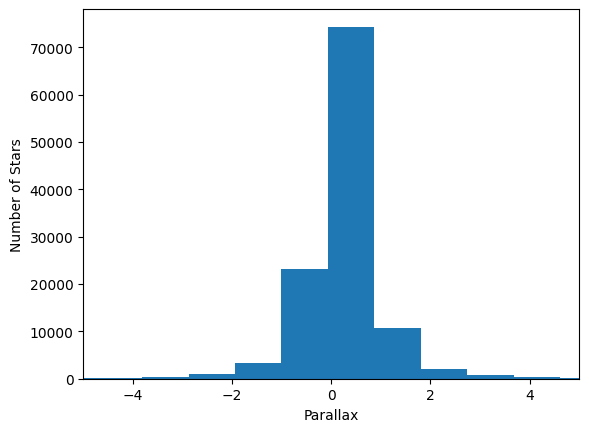

Looking by eye, I can see on the plot that most stars have parallaxes around roughly -2 to 3. You could choose to be more generous or more strict.


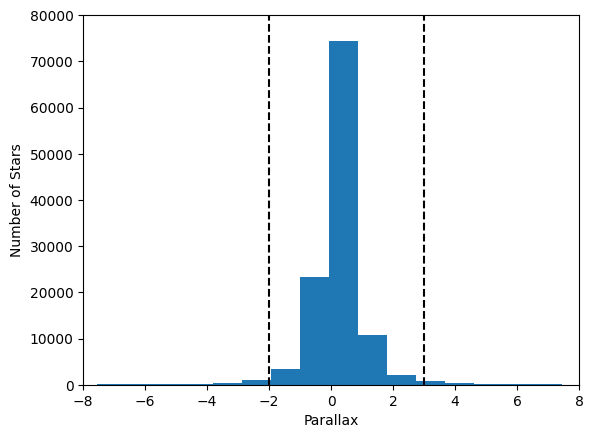

In [3]:
### In this cell we will decide which stars are in the cluster based on parallax

plt.hist(search['parallax'],bins=1000) # Here I am plotting the parallax as a histogram. This is showing what parallaxes are most common. I also specified for there to be 1000 different bins.
plt.xlabel('Parallax')
plt.ylabel("Number of Stars")
plt.xlim(-5,5)
plt.show()

print("Looking by eye, I can see on the plot that most stars have parallaxes around roughly -2 to 3. You could choose to be more generous or more strict.")

plt.hist(search['parallax'],bins=1000) # Here I am plotting the parallax as a histogram. This is showing what parallaxes are most common. I also specified for there to be 1000 different bins.
plt.xlabel('Parallax')
plt.ylabel("Number of Stars")
plt.xlim(-8,8)
plt.ylim(0,80000)
plt.vlines(x=-2,ymin=0,ymax=80000,color='k',linestyle='--') #I am drawing a vertical line to show our parallax limits
plt.vlines(x=3,ymin=0,ymax=80000,color='k',linestyle='--') #I am drawing a vertical line to show our parallax limits
plt.show()

If you would prefer to make a more quantitative cut, you can compute the average of the parallaxes since this is approximately the parallax of the
globular cluster. Then we can use the standard deviation to select stars within some range of the mean. Standard deviation is a measure of how spread the data typically is from the average. Scientists typically use 3-5 standard deviations to be within an acceptable range. 68% of the data is within 1 standard deviation and 97.7% is within 3 standard deviations. This means we are only getting rid of outliers

The average parallax of the globular cluster is 0.23491928016180372 and the standard deviation is 2.227324278931393


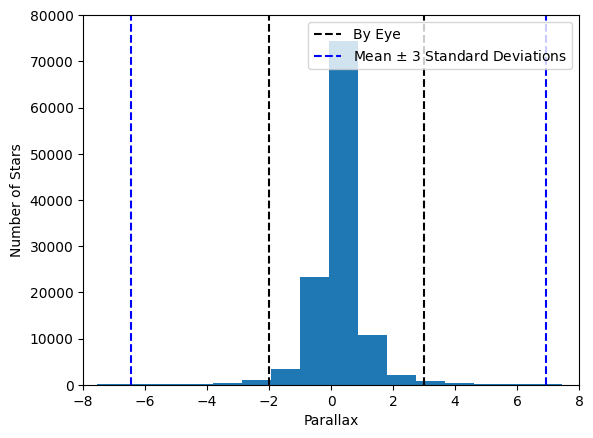

In [4]:
### I will use the functions np.mean() to find the average, and then np.std() to find the standard deviation of the data
average_parallax = np.mean(search['parallax']) #this is the average parallax
std_parallax = np.std(search['parallax']) #this is the standard deviation of the parallax
print("The average parallax of the globular cluster is",average_parallax,"and the standard deviation is",std_parallax)

### Now we can use this information to actually choose which data points we want to keep: the stars we think are part of the cluster
### Here I will use the mean and standard deviation calculations. We want data with 3 standard deviations from the mean.
lowerlimit = average_parallax - 3 * std_parallax
upperlimit = average_parallax + 3 * std_parallax

###Let's compare this to the cut we made by eye.
plt.hist(search['parallax'],bins=1000)
plt.xlabel('Parallax')
plt.ylabel("Number of Stars")
plt.xlim(-8,8)
plt.ylim(0,80000)
plt.vlines(x=-2,ymin=0,ymax=80000,color='k',linestyle='--',label='By Eye') #I am drawing a vertical line to show our parallax limits we made by eye
plt.vlines(x=3,ymin=0,ymax=80000,color='k',linestyle='--') #I am drawing a vertical line to show our parallax limits we made by eye
plt.vlines(x=lowerlimit,ymin=0,ymax=80000,color='b',linestyle='--',label='Mean $\pm$ 3 Standard Deviations') #I am drawing a vertical line to show our parallax limits we made quantitatevly
plt.vlines(x=upperlimit,ymin=0,ymax=80000,color='b',linestyle='--') #I am drawing a vertical line to show our parallax limits we made quantitatevly
plt.legend()
plt.show()

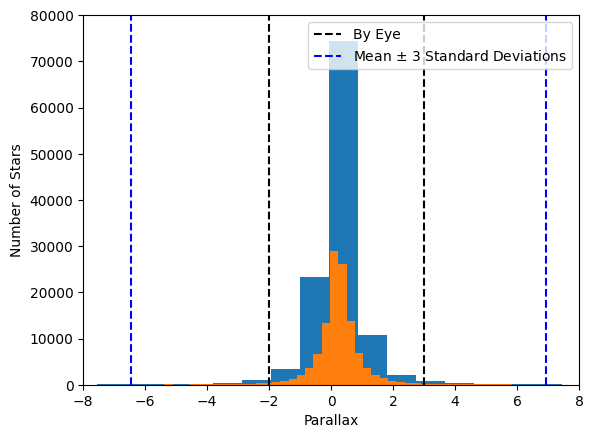

In [5]:
### Now that we will have cleaned data we will name our data 'cleaned'. We want the cleaned data to be the same as what we called 'search' before but
### with parallax within 3 standard deviations from the mean.
cleaned = search[search['parallax']<=upperlimit] # get the search data whose parallax is below the upper limit
cleaned = cleaned[cleaned['parallax']>=lowerlimit] # notice now we are selecting from our 'cleaned' data, those that are above the lower limit

### Now we can plot again to see the cut we made
plt.hist(search['parallax'],bins=1000)
plt.hist(cleaned['parallax'],bins=50)
plt.xlabel('Parallax')
plt.ylabel("Number of Stars")
plt.xlim(-8,8)
plt.ylim(0,80000)
plt.vlines(x=-2,ymin=0,ymax=80000,color='k',linestyle='--',label='By Eye') #I am drawing a vertical line to show our parallax limits we made by eye
plt.vlines(x=3,ymin=0,ymax=80000,color='k',linestyle='--') #I am drawing a vertical line to show our parallax limits we made by eye
plt.vlines(x=lowerlimit,ymin=0,ymax=80000,color='b',linestyle='--',label='Mean $\pm$ 3 Standard Deviations') #I am drawing a vertical line to show our parallax limits we made quantitatevly
plt.vlines(x=upperlimit,ymin=0,ymax=80000,color='b',linestyle='--') #I am drawing a vertical line to show our parallax limits we made quantitatevly
plt.legend()
plt.show()

Now we have selected stars that have parallax (i.e. distance) similar to the globular cluster!

Next we will select stars that also seem to be moving with the globular cluster, meaning that their proper motions in right ascension and declination are close to that of the cluster. We will be using a similar approach as above.

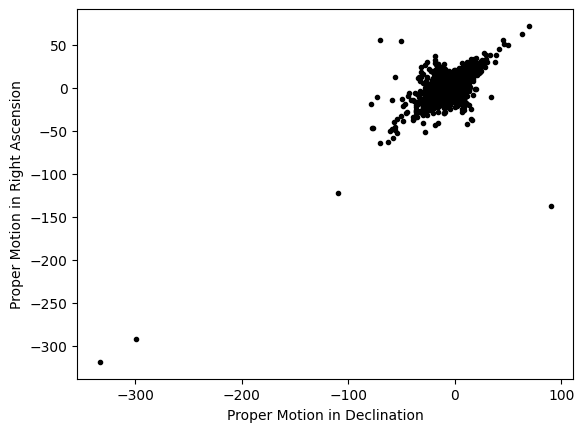

Again, looking by eye we see that most of the data points have proper motions between -50 to 50 in right ascension and declination.


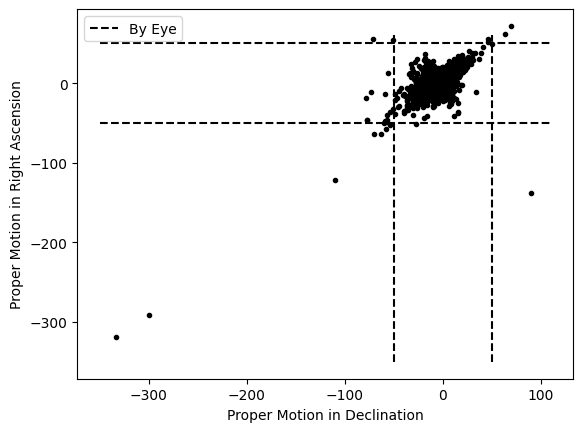

In [6]:
### Here, we plot the proper motions in right ascension and declination
plt.plot(cleaned['pmdec'],cleaned['pmra'],marker='.',linestyle = '',color='k')
plt.xlabel('Proper Motion in Declination')
plt.ylabel("Proper Motion in Right Ascension")
plt.show()

print("Again, looking by eye we see that most of the data points have proper motions between -50 to 50 in right ascension and declination.")

plt.plot(cleaned['pmdec'],cleaned['pmra'],marker='.',linestyle = '',color='k')
plt.xlabel('Proper Motion in Declination')
plt.ylabel("Proper Motion in Right Ascension")
plt.vlines(x=-50,ymin=-350,ymax=60,color='k',linestyle='--',label='By Eye') # I am drawing a vertical line to show our propermotion limits we made by eye
plt.vlines(x=50,ymin=-350,ymax=60,color='k',linestyle='--')
plt.hlines(y=-50,xmin=-350,xmax=110,color='k',linestyle='--') # Next we can do horizontal lines
plt.hlines(y=50,xmin=-350,xmax=110,color='k',linestyle='--')
plt.legend()
plt.show()

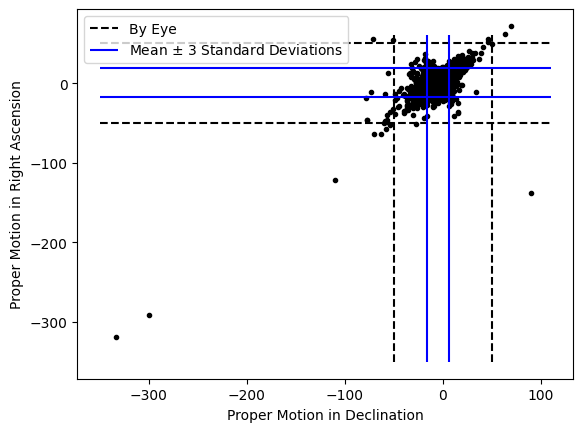

In [7]:
### We can also use the mean and standard deviation in both right ascension and declination.
average_pmra = np.mean(cleaned['pmra']) #this is the average proper motion in right ascension, notice we are using the data we already cleaned for parallax
std_pmra = np.std(cleaned['pmra'])
average_pmdec = np.mean(cleaned['pmdec']) #now for declination
std_pmdec = np.std(cleaned['pmdec'])

### Now we can use this information to actually choose which data points we want to keep: the stars we think are part of the cluster
### Here I will use the mean and standard deviation calculations. We want data with 3 standard deviations from the mean.
lowerlimit_ra = average_pmra - 3 * std_pmra
upperlimit_ra = average_pmra + 3 * std_pmra

lowerlimit_dec = average_pmdec - 3 * std_pmdec
upperlimit_dec = average_pmdec + 3 * std_pmdec

###Let's compare this to the cut we made by eye.
plt.plot(cleaned['pmdec'],cleaned['pmra'],marker='.',linestyle = '',color='k')
plt.xlabel('Proper Motion in Declination')
plt.ylabel("Proper Motion in Right Ascension")
plt.vlines(x=-50,ymin=-350,ymax=60,color='k',linestyle='--',label='By Eye') # I am drawing a vertical line to show our propermotion limits we made by eye
plt.vlines(x=50,ymin=-350,ymax=60,color='k',linestyle='--')
plt.hlines(y=-50,xmin=-350,xmax=110,color='k',linestyle='--') # Next we can do horizontal lines
plt.hlines(y=50,xmin=-350,xmax=110,color='k',linestyle='--')

plt.vlines(x=lowerlimit_dec,ymin=-350,ymax=60,color='b',linestyle='-',label='Mean $\pm$ 3 Standard Deviations') # I am drawing a vertical line to show our propermotion limits we made by eye
plt.vlines(x=upperlimit_dec,ymin=-350,ymax=60,color='b',linestyle='-')
plt.hlines(y=lowerlimit_ra,xmin=-350,xmax=110,color='b',linestyle='-') # Next we can do horizontal lines
plt.hlines(y=upperlimit_ra,xmin=-350,xmax=110,color='b',linestyle='-')
plt.legend()
plt.show()

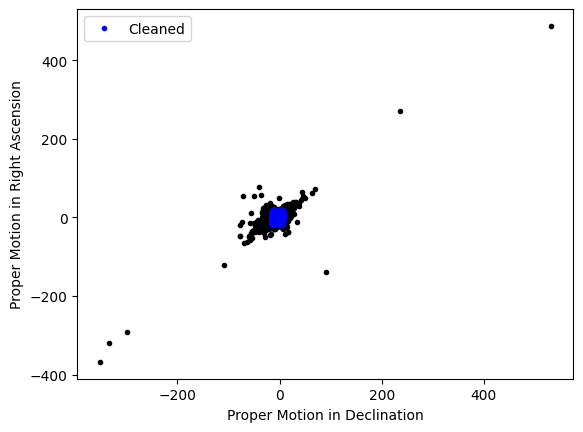

In [8]:
### We make our final cut with the proper motions

cleaned = cleaned[cleaned['pmra']<=upperlimit_ra]
cleaned = cleaned[cleaned['pmra']>=lowerlimit_ra]
cleaned = cleaned[cleaned['pmdec']<=upperlimit_dec]
cleaned = cleaned[cleaned['pmdec']>=lowerlimit_dec]

###Let's compare this to the original data
plt.plot(search['pmdec'],search['pmra'],marker='.',linestyle = '',color='k')
plt.plot(cleaned['pmdec'],cleaned['pmra'],marker='.',linestyle = '',color='b',label='Cleaned')
plt.xlabel('Proper Motion in Declination')
plt.ylabel("Proper Motion in Right Ascension")

plt.legend()
plt.show()

Now you have your set of cleaned data, meaning you are more confident that your data only includes stars that are in the cluster you selected. Next we estimate the age, but first some introduction on how that is done!

### HR Diagram and Turnoff Point

A Hertzsprung–Russell (HR) diagram is a scatter plot of stars, as seen in Figure 5. Plotted with a measure of the star's brightness (also known as absolute magnitude or luminosity) on the Y axis and its colour (also known as stellar classifications or effective temperature) on the X axis, the HR diagram provides a plethora of information about stars.

Where a star falls on this plot details certain properties, including its age and where it is in its lifecycle. In Figure 5, the diagonal line across the centre of the plot is called the main-sequence; this is where most stars spend the majority of their life. As stars age, they will turn off the main-sequence and towards other branches of the diagram (i.e. giants and supergiants). Where a group of stars, such as a globular cluster, turns off the main sequence is considered its turnoff point, which can provide an estimate age of the cluster.

For example, if a cluster has a turn off point around temperature 30000K (or class O with blue colour), the age of the cluster would be < 40 million years, as per Table 2.
Similarly, given a turnoff point around the F class stars (with temperature on the X axis around 6000K), the age of the cluster would be between 5.1 to 9.3 billion years.

Note that all temperatures here are in Kelvin (K), which is related to Celcius via: 0 °C + 273.15 = 273.15 K

---
---

<div>
<img src="https://raw.githubusercontent.com/daniellamorrone/daniellamorrone.github.io/main/images/ms.png" width="400"/>
</div>

**Figure (5)**. An example of a Hertzsprung-Russell Diagram. The black lines are examples of where a turnoff point may fall.
(Image adapted from a [European Southern Observatory diagram](https://cdn.eso.org/images/screen/eso0728c.jpg).)

---
---

| Spectral Class     | Apparent Colour      | G-R Colour	     | Luminosity*	| Temperature**	     | Turnoff Age	     |
|----------|-----------|-----------|------|---------|-----------|
| O | Blue          | -1.0 to -0.5  | > 30,000      | > 30,000      | < 40 million years |
| B | Light Blue    | -0.5 to -0.3  | 25,000–30,000 | 10,000–30,000 | 40 million–2.3 billion years |
| A | White         | -0.2 to 0.2   | 5-25          | 7,500–10,000  | 2.3–5.1 billion years |
| F | Light Yellow  | 0.2 to 0.3    | 1.5-5         | 6,000–7,500   | 5.1–9.3 billion years |
| G | Yellow        | 0.3 to 0.6    | 0.6-1.5       | 5,200–6,000   | 9.3–15.6 billion years |
| K | Orange        | 0.6 to 1.4    | 0.08-0.6      | 3,700–5,200   | 15.6–49.4 billion years |
| M | Red           | 1.4 to 2.0    | < 0.08        | 2,400–3,700   | >49.4 billion years |

**Table (2)**. Characteristics of stars in the seven spectral classes. Credit: Carmichael, Romanowsky, & Brodie (2020).

\*The number of times brighter than the Sun.
\**In degrees Kelvin (= Celsius + 273)


### Make your HR Diagram

In this section, you will make an HR diagram for your globular cluster and locate its turnoff point.

For your HR diagram, the Y axis will be measures apparent magnitude - this is the intrinsic brightness of the stars - and the X axis will be the colour - specifically, what we call the G-R colour.

Using the numpy log function (np.log10), find the brightness (also known as absolute magnitude, *M*) of the stars using their apparent magnitude (*m*) and the parallax (*p*) by employing this formula:

$$M = m - 5\times\log\left({\frac{100}{p}}\right)$$

In [9]:
def get_mag_plx_color(catalog):

  # this line takes the apparent magnitude at a specific colour (G) using the 'phot_g_mean_mag' data parameter
  # and adjusts for any light scattering, called reddening, by subtracting the 'a_g_val' data parameter
  mag = catalog['phot_g_mean_mag'] - catalog['a_g_val']

  # this line takes the apparent magnitude at a specific colour (G) using the 'phot_g_mean_mag' data parameter
  plx = catalog['parallax']

  # this line takes the colour of the stars in the cluster using the 'g_rp' data parameter
  # and adjusts for any reddening by subtracting the 'e_bp_min_rp_val' data parameter
  colour = catalog['g_rp'] - catalog['e_bp_min_rp_val']

  return mag, plx, colour

In [10]:
# calls the above function to yield the apparent magnitude, parallax and colour
m, p, colour = get_mag_plx_color(cleaned)

Define a function to compute the absolute magnitude formula here:

In [11]:
def abs_mag(m,p):
  #takes in parameters of apparent magnitude (m) and parallax (p)
  return(m - 5*np.log10(100/p))

Plot the HR diagram:

/tmp/ipykernel_41803/3456485773.py:3: RuntimeWarning: invalid value encountered in log10
  return(m - 5*np.log10(100/p))


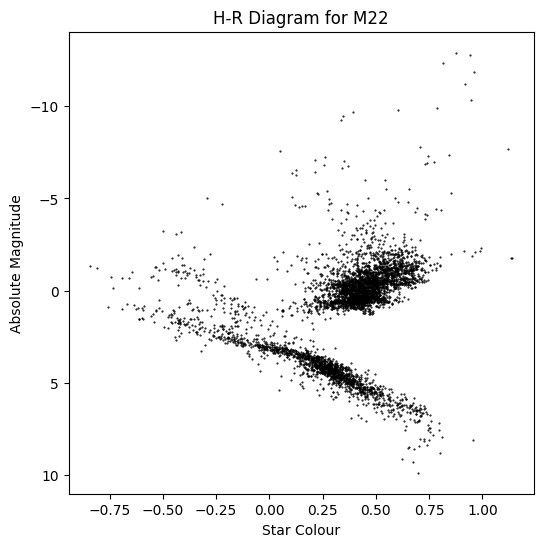

In [12]:
plt.figure(figsize=(6,6), dpi=100) #creates the figure, sets the size and the quality
plt.plot(colour,
         abs_mag(m,p),
         color = 'black', linestyle = '', marker = '.', markersize = 1)

plt.xlabel('Star Colour')
plt.ylabel('Absolute Magnitude')
plt.title('H-R Diagram for M22')

plt.gca().invert_yaxis()  # this inverts the y axis,
                          # making it go from top (lower values) to bottom (higher values)

plt.show()

### Where is the turnoff point on your HR Diagram?

Can you find the turnoff point of the globular cluster on your HR diagram? If you are having trouble finding it, try this:
 - if there are **too few points**, go back to where you query the data and make the the box you're looking within bigger by **increasing the height and width** or be less strict when you are cleaning your data.
 - if there are **too many points**, go back to where you query the data and make the the box you're looking within smaller by **decreasing the height and width** or be more strict when you are cleaning your data.

In [13]:
TurnOff_colour = -0.125
TurnOff_absM = 2.5

/tmp/ipykernel_41803/3456485773.py:3: RuntimeWarning: invalid value encountered in log10
  return(m - 5*np.log10(100/p))


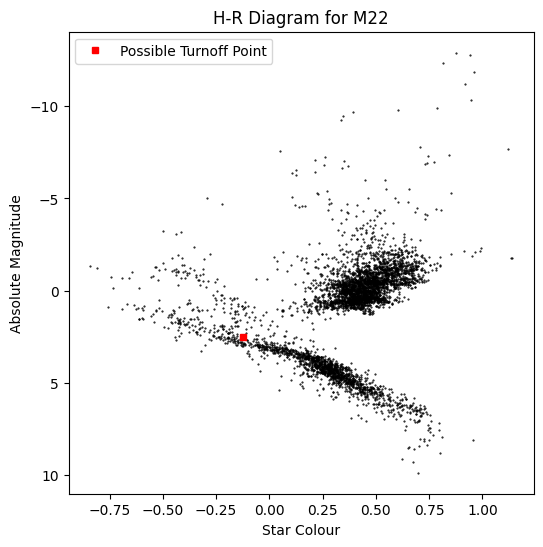

In [14]:
### Plotting the H-R diagram again
plt.figure(figsize=(6,6), dpi=100) #creates the figure, sets the size and the quality
plt.plot(colour,
         abs_mag(m,p),
         color = 'black', linestyle = '', marker = '.', markersize = 1)

plt.xlabel('Star Colour')
plt.ylabel('Absolute Magnitude')
plt.title('H-R Diagram for M22')

plt.gca().invert_yaxis()  # this inverts the y axis,
                          # making it go from top (lower values) to bottom (higher values)

### Adding a point on the plot for the possible turnoff point
plt.plot(TurnOff_colour,
         TurnOff_absM,
         marker='s',color='r',ms='5',linestyle='',label='Possible Turnoff Point')

plt.legend()
plt.show()

### Match Your Turnoff Point to a Star Classification
In this section, you will match the turnoff point you found above to its corresponding stellar classification from Table 2.

---
*Recall Table 2*:

| Spectral Class     | Apparent Colour      | G-R Colour	     | Luminosity*	| Temperature**	     | Turnoff Age	     |
|----------|-----------|-----------|------|---------|-----------|
| O | Blue          | -1.0 to -0.5  | > 30,000      | > 30,000      | < 40 million years |
| B | Light Blue    | -0.5 to -0.3  | 25,000–30,000 | 10,000–30,000 | 40 million–2.3 billion years |
| A | White         | -0.2 to 0.2   | 5-25          | 7,500–10,000  | 2.3–5.1 billion years |
| F | Light Yellow  | 0.2 to 0.3    | 1.5-5         | 6,000–7,500   | 5.1–9.3 billion years |
| G | Yellow        | 0.3 to 0.6    | 0.6-1.5       | 5,200–6,000   | 9.3–15.6 billion years |
| K | Orange        | 0.6 to 1.4    | 0.08-0.6      | 3,700–5,200   | 15.6–49.4 billion years |
| M | Red           | 1.4 to 2.0    | < 0.08        | 2,400–3,700   | >49.4 billion years |

**Table (2)**. Characteristics of stars in the seven spectral classes. Credit: Carmichael, Romanowsky, & Brodie (2020).

\*The number of times brighter than the Sun.
\**In degrees Kelvin (= Celsius + 273)

---


From the H-R Diagram for globular cluster M22, the colour at the possible turn-off point is around -0.125. Comparing this to Table 2 gives an approximate turn off age of 2.3 billion years to 5.1 billion years.

In [15]:
max_age_M22 = 5.1 # billion years

What was the turnoff age that you found? As we explore the other globular clusters, this about what this means about the age of the universe.

---
---
# Do it yourself!

Now we move onto the "do it yourself" section...

Anytime you see <<< >>>, that's where you have to fill in information yourself.


---
---

# M92 Cluster
| Name     | RA  [deg]      | DEC  [deg]     | Size [arcmin] |
|----------|-----------|-----------|------|
| M92 |259.2792 | 43.1358 |    14  |

In [16]:
RA = 259.2792
DEC = 43.1358
size = 14

In [17]:
coord = SkyCoord(ra=RA, dec=DEC, unit=(u.degree, u.degree), frame='icrs')
### This is the coordinate we are going to focus our search on
width = u.Quantity(size + 3, u.arcmin)
### This is the width of the box we will search over, it is slightly wider than the size of the cluster
height = u.Quantity(size + 3, u.arcmin)
### Likewise, this is the height of the box around the coordinate we will search over

search = Gaia.query_object_async(coordinate=coord, width=width, height=height) # This is the line where we submit our search for objects in the box we defined around the coordinates we specifed
### This will take about several minutes to run!

INFO: Query finished. [astroquery.utils.tap.core]


### Cleaning Data

First cleaning by parallax...

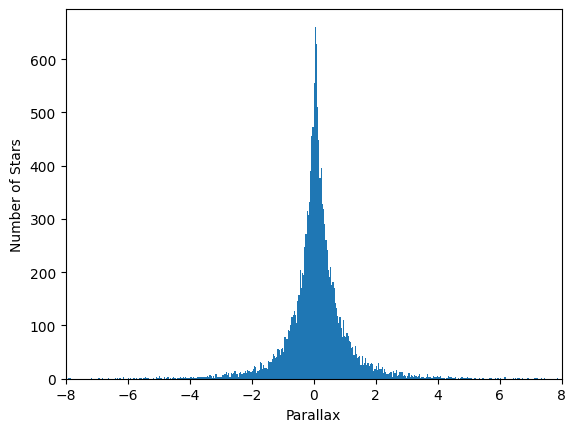

In [18]:
### Here, we are plotting the parallax as a histogram with 1000 bins.
plt.hist(search['parallax'],
         bins=1000)
### This is showing what parallaxes are most common.
plt.xlabel('Parallax')
plt.ylabel("Number of Stars")
plt.xlim(-8,8)
plt.show()

Looking at the parallax histogram by eye...

Between what range do most of the parallaxes fall on the histogram? What is roughly the maximum of this range? What is the minimum?

You could choose to be generous or more strict with these choices.

In [19]:
min_range = -4
max_range = 4

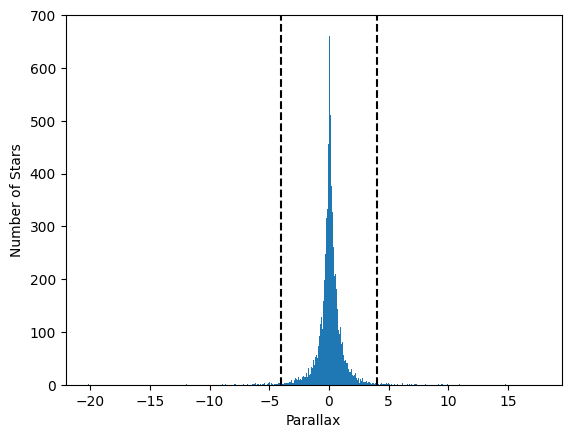

In [20]:
### Here, we are plotting the parallax as a histogram again.
plt.hist(search['parallax'],
         bins=1000)
plt.xlabel('Parallax')
plt.ylabel("Number of Stars")

### Here, we add vertical lines on the histogram to represent our cut range
plt.vlines(x = min_range,
           ymin=0,ymax=700,color='k',linestyle='--') ### a vertical line to show our minimum parallax limit
plt.vlines(x = max_range,
           ymin=0,ymax=700,color='k',linestyle='--') ### a vertical line to show our maximum parallax limit

plt.ylim(0,700)
plt.show()

Looking at the parallax histogram from a more quantitative approach...

Use the np.mean() and the np.std() functions to find the average and standard deviation of the parallax data:

In [21]:
average_parallax = np.mean(search['parallax'])
std_parallax = np.std(search['parallax'])

print("The average parallax of the globular cluster is",average_parallax)
print("The parallax standard deviation of the globular cluster is",std_parallax)

The average parallax of the globular cluster is 0.09853902969008393
The parallax standard deviation of the globular cluster is 1.1533317095043627


We can use this information to actually choose which data points we want to keep: the stars we think are part of the cluster.

Using 3-5 times the standard deviation, we will identify the lower and upper limits:

In [22]:
n_std = 5

### Using the mean and standard deviation calculations, we find the limits.
### We want data within 3 to 5 (the n_std you choose) standard deviations from the mean.
lowerlimit = average_parallax - n_std * std_parallax
upperlimit = average_parallax + n_std * std_parallax

Let's compare this quantitative cut to the cut we made by eye.


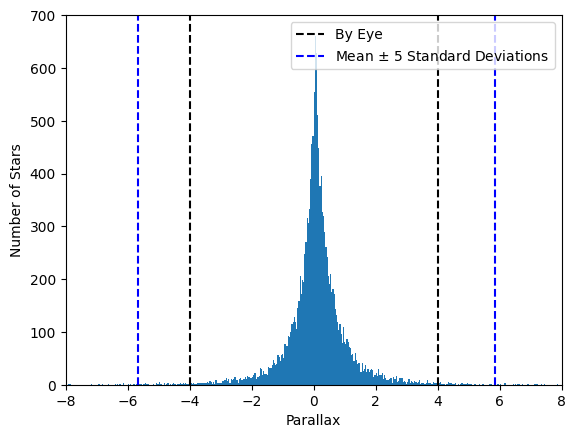

In [23]:
### Here, we are plotting the parallax as a histogram again.
plt.hist(search['parallax'],
         bins=1000)
plt.xlabel('Parallax')
plt.ylabel("Number of Stars")
plt.xlim(-8,8)

### Vertical lines for the cut by eye
plt.vlines(x = min_range,
           ymin=0,ymax=700,color='k',linestyle='--',label='By Eye') #I am drawing a vertical line to show our parallax limits we made by eye
plt.vlines(x = max_range,
           ymin=0,ymax=700,color='k',linestyle='--') #I am drawing a vertical line to show our parallax limits we made by eye

### Vertical lines for the quantitative cut
plt.vlines(x = lowerlimit,
           ymin=0,ymax=700,color='b',linestyle='--',label='Mean $\pm$ {} Standard Deviations'.format(n_std)) #I am drawing a vertical line to show our parallax limits we made quantitatevly
plt.vlines(x = upperlimit,
           ymin=0,ymax=700,color='b',linestyle='--') #I am drawing a vertical line to show our parallax limits we made quantitatevly

plt.legend()
plt.ylim(0,700)
plt.show()

Which do you want to use? The cut by eye or the quantitative cut?

In [24]:
cut_up_lim = upperlimit
cut_low_lim = lowerlimit

Now that we will have cleaned data we will name our data 'cleaned'. We want the cleaned data to be the same as what we called 'search' before but with parallax within our cut range.

We want to get the search data whose parallax is below (<=) the upper limit and above (>=) the lower limit...

In [25]:
search_parallax = search['parallax']

cleaned = search[(search_parallax <= cut_up_lim) & (search_parallax >= cut_low_lim)]
### notice that we have done two cuts at once, this is possible by using round brackets () around the cuts and '&' between them

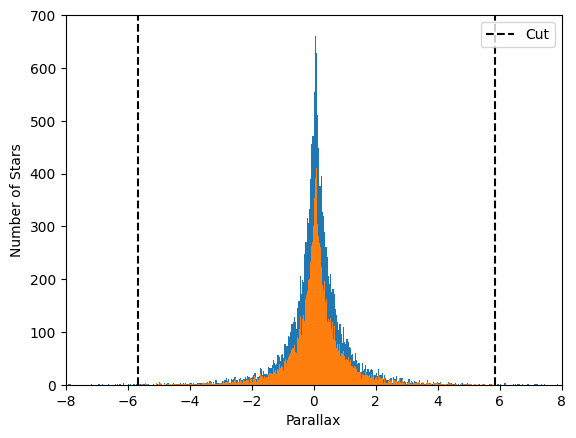

In [26]:
### Now we can plot again to see the cut we made

### Plotting a histogram of the uncleaned parallax values from 'search'
plt.hist(search['parallax'],
         bins=1000)
### Plotting a histogram of the cleaned parallax values from 'cleaned'
plt.hist(cleaned['parallax'],
         bins=500)

plt.xlabel('Parallax')
plt.ylabel("Number of Stars")
plt.xlim(-8,8)
plt.ylim(0,700)

### Vertical lines for the cut
plt.vlines(x = cut_low_lim,
           ymin=0,ymax=700,color='k',linestyle='--', label='Cut')
plt.vlines(x = cut_up_lim,
           ymin=0,ymax=700,color='k',linestyle='--')

plt.legend()
plt.show()

We have selected stars that have parallax (i.e. distance) similar to the globular cluster!

Now cleaning the proper motions...

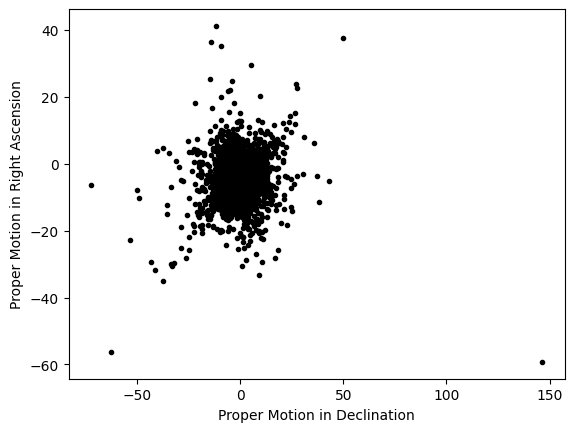

In [27]:
### Here, we make a plot of the proper motion in the declination vs. in the right ascension
plt.plot(cleaned['pmdec'],
         cleaned['pmra'],
         marker='.',linestyle = '',color='k')

plt.xlabel('Proper Motion in Declination')
plt.ylabel("Proper Motion in Right Ascension")
plt.show()

Looking at the proper motion plot by eye...

Between what range do most of the data points fall? What is roughly the maximum of this range on the declination? What is the minimum? How about for the right ascension?

You could choose to be generous or more strict with these choices.

In [28]:
### For the declination...
min_dec_pm_range = -20
max_dec_pm_range = 15

### For the right ascension...
min_ra_pm_range = -18
max_ra_pm_range = 10

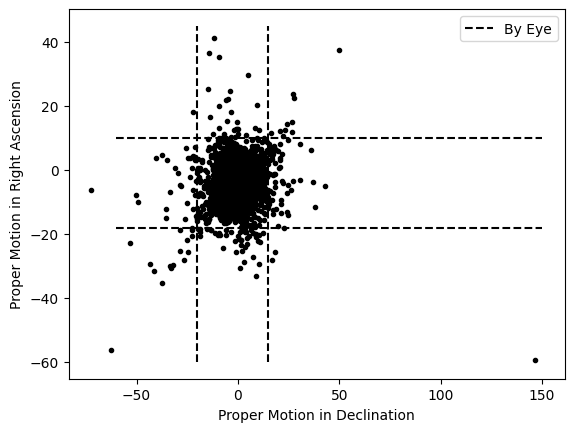

In [29]:
### Here, we make the proper motion plot again
plt.plot(cleaned['pmdec'],
         cleaned['pmra'],
         marker='.',linestyle = '',color='k')

plt.xlabel('Proper Motion in Declination')
plt.ylabel("Proper Motion in Right Ascension")

### Add vertical lines to represent our cut range for the declination proper motion
plt.vlines(x = min_dec_pm_range,
           ymin=-60,ymax=45,color='k',linestyle='--',label='By Eye') # I am drawing a vertical line to show our propermotion limits we made by eye
plt.vlines(x = max_dec_pm_range,
           ymin=-60,ymax=45,color='k',linestyle='--')

### Add horizontal lines to represent our cut range for the right ascension proper motion
plt.hlines(y = min_ra_pm_range,
           xmin=-60,xmax=150,color='k',linestyle='--') # Next we can do horizontal lines
plt.hlines(y = max_ra_pm_range,
           xmin=-60,xmax=150,color='k',linestyle='--')

plt.legend()
plt.show()

Looking at the proper motions from a more quantitative approach...

Use the np.mean() and the np.std() functions to find the average and standard deviation of the proper motion data:

In [30]:
### For the declination...
average_pmdec = np.mean(cleaned['pmdec'])
std_pmdec = np.std(cleaned['pmdec'])

### For the right ascension...
average_pmra = np.mean(cleaned['pmra'])
std_pmra = np.std(cleaned['pmra'])

Again, using 3 to 5 times the standard deviation, we can pick out the data points around the average...

In [31]:
n_std = 5

### For the declination...
lowerlimit_dec = average_pmdec - n_std * std_pmdec
upperlimit_dec = average_pmdec + n_std * std_pmdec

### For the right ascension...
lowerlimit_ra = average_pmra - n_std * std_pmra
upperlimit_ra = average_pmra + n_std * std_pmra

Let's compare this quantitative cut to the cut we made by eye.

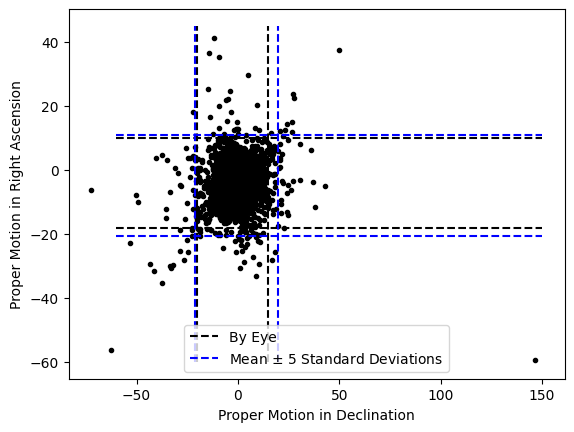

In [32]:
### Here, we make the proper motion plot again
plt.plot(cleaned['pmdec'],
         cleaned['pmra'],
         marker='.',linestyle = '',color='k')

plt.xlabel('Proper Motion in Declination')
plt.ylabel("Proper Motion in Right Ascension")


### Add vertical lines to represent our cut range for the declination proper motion
plt.vlines(x = min_dec_pm_range,
           ymin=-60,ymax=45,color='k',linestyle='--',label='By Eye') # I am drawing a vertical line to show our propermotion limits we made by eye
plt.vlines(x = max_dec_pm_range,
           ymin=-60,ymax=45,color='k',linestyle='--')

### Add horizontal lines to represent our cut range for the right ascension proper motion
plt.hlines(y = min_ra_pm_range,
           xmin=-60,xmax=150,color='k',linestyle='--') # Next we can do horizontal lines
plt.hlines(y = max_ra_pm_range,
           xmin=-60,xmax=150,color='k',linestyle='--')


### Add vertical lines for the quantitative cut in the declination proper motion
plt.vlines(x = lowerlimit_dec,
           ymin=-60,ymax=45,color='b',linestyle='--',label='Mean $\pm$ {} Standard Deviations'.format(n_std)) # I am drawing a vertical line to show our propermotion limits we made by eye
plt.vlines(x = upperlimit_dec,
           ymin=-60,ymax=45,color='b',linestyle='--')

### Add horizontal lines for the quantitative cut in the right ascension proper motion
plt.hlines(y = lowerlimit_ra,
           xmin=-60,xmax=150,color='b',linestyle='--') # Next we can do horizontal lines
plt.hlines(y = upperlimit_ra,
           xmin=-60,xmax=150,color='b',linestyle='--')

plt.legend()
plt.show()

Which do you want to use? The cut by eye or the quantitative cut?

In [33]:
### For the declination...
cut_uplim_dec = upperlimit_dec
cut_lowlim_dec = lowerlimit_dec

### For the right ascension...
cut_uplim_ra = upperlimit_ra
cut_lowlim_ra = lowerlimit_ra

Now that we will cut our 'cleaned' data even more using these proper motions cuts.

We want to get the data whose proper motions are below (<=) the upper limits and above (>=) the lower limits...

In [34]:
### For the declination...
cleaned = cleaned[cleaned['pmdec'] <= cut_uplim_dec]
cleaned = cleaned[cleaned['pmdec'] >= cut_lowlim_dec]

### For the right ascension...
cleaned = cleaned[cleaned['pmra'] <= cut_uplim_ra]
cleaned = cleaned[cleaned['pmra'] >= cut_lowlim_ra]

Now let's compare this final cleaned data to our original search data...

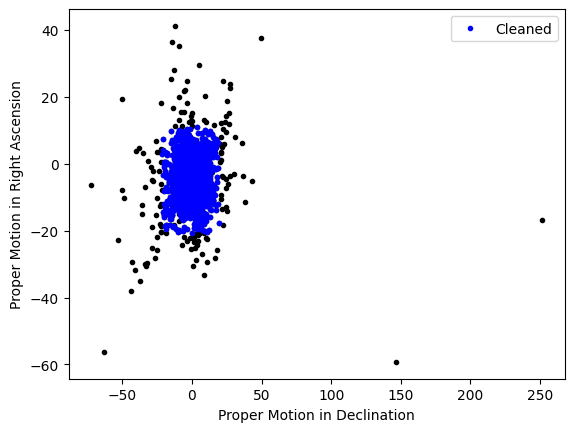

In [35]:
### Here we plot the proper motions from the 'search' data
plt.plot(search['pmdec'],
         search['pmra'],
         marker='.',linestyle = '',color='k')

### Here we plot the proper motions from the 'cleaned' data
plt.plot(cleaned['pmdec'],
         cleaned['pmra'],
         marker='.',linestyle = '',color='b',label='Cleaned')

plt.xlabel('Proper Motion in Declination')
plt.ylabel("Proper Motion in Right Ascension")

plt.legend()
plt.show()

Now you have your set of cleaned data, meaning you are more confident that your data only includes stars that are in the cluster you selected. Next we estimate the age, but first some introduction on how that is done!

### Make your HR Diagram

In this section, you will make an HR diagram for your globular cluster and locate its turnoff point.

For your HR diagram, the Y axis will be measures apparent magnitude - this is the intrinsic brightness of the stars - and the X axis will be the colour - specifically, what we call the G-R colour.

Using the numpy log function (np.log10), find the brightness (also known as absolute magnitude, *M*) of the stars using their apparent magnitude (*m*) and the parallax (*p*) by employing this formula:

$$M = m - 5\times\log\left({\frac{100}{p}}\right)$$

Recall the ```get_mag_plx_color``` function from above:


```
apparent_magnitude, parallax, colour = get_mag_plx_color(catalog)
```

Call this function with the 'cleaned' data catalog to yield the apparent magnitude (m), parallax (p) and colour:

In [36]:
m, p, colour = get_mag_plx_color(cleaned)

Recall how we defined the absolute magnitude function (```abs_mag```) from above:
```
absolute_magnitude = abs_mag(apparent_magnitude, parallax)
```
Call this function with the parameters of apparent magnitude (m) and parallax (p) to yield the absolute magnitude (M):

In [37]:
M = abs_mag(m,p)

/tmp/ipykernel_41803/3456485773.py:3: RuntimeWarning: invalid value encountered in log10
  return(m - 5*np.log10(100/p))


Plot the HR diagram:

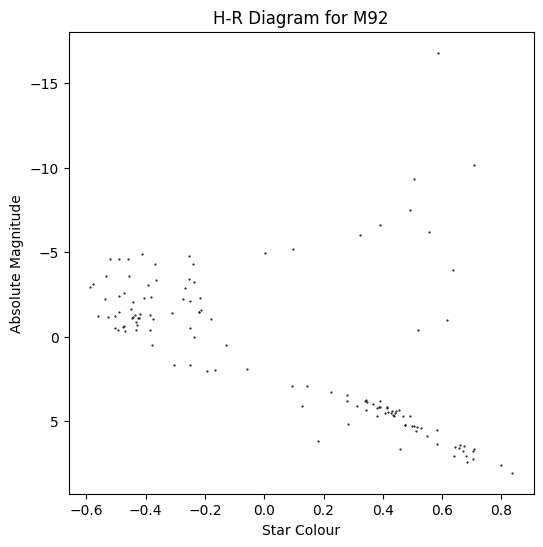

In [38]:
plt.figure(figsize=(6,6), dpi=100) #creates the figure, sets the size and the quality

### Plotting the absolute magnitude vs. the colour
plt.plot(colour,
         M,
         color = 'black', linestyle = '', marker = '.', markersize = 1)

plt.xlabel('Star Colour')
plt.ylabel('Absolute Magnitude')
plt.title('H-R Diagram for M92')

plt.gca().invert_yaxis()  # this inverts the y axis
plt.show()

###Where is the turnoff point on your HR Diagram?

Can you find the turnoff point of the globular cluster on your HR diagram? If you are having trouble finding it, try this:
 - if there are **too few points**, go back to where you query the data and make the the box you're looking within bigger by **increasing the height and width** or be less strict when you are cleaning your data.
 - if there are **too many points**, go back to where you query the data and make the the box you're looking within smaller by **decreasing the height and width** or be more strict when you are cleaning your data.

After examining this H-R diagram by eye, where does the turn off point seem to be? What are the approximate colour and magnitude values of this point?

In [39]:
TurnOff_colour = -0.25
TurnOff_absM = -2

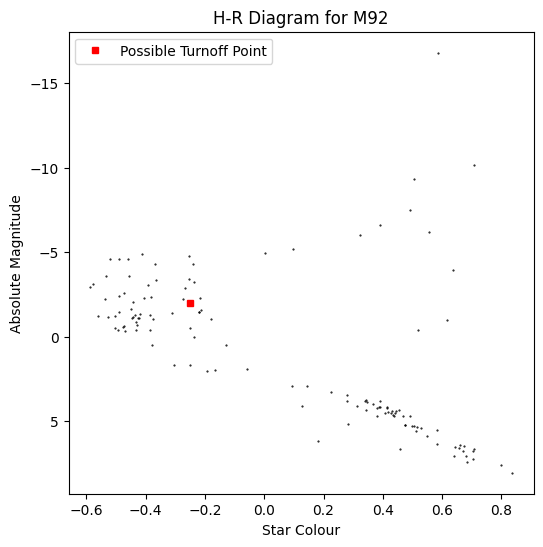

In [40]:
plt.figure(figsize=(6,6), dpi=100) #creates the figure, sets the size and the quality

### Plotting the absolute magnitude vs. the colour
plt.plot(colour,
         M,
         color = 'black', linestyle = '', marker = '.', markersize = 1)

plt.xlabel('Star Colour')
plt.ylabel('Absolute Magnitude')
plt.title('H-R Diagram for M92')

### Plot the approximate turn off point
plt.plot(TurnOff_colour,
         TurnOff_absM,
         marker='s',color='r',ms='5',linestyle='',label='Possible Turnoff Point')

plt.legend()
plt.gca().invert_yaxis()  # this inverts the y axis
plt.show()


### Match Your Turnoff Point to a Star Classification
Match the turnoff point you found above to its corresponding stellar classification from Table 2.

---
*Recall Table 2*:

| Spectral Class     | Apparent Colour      | G-R Colour	     | Luminosity*	| Temperature**	     | Turnoff Age	     |
|----------|-----------|-----------|------|---------|-----------|
| O | Blue          | -1.0 to -0.5  | > 30,000      | > 30,000      | < 40 million years |
| B | Light Blue    | -0.5 to -0.3  | 25,000–30,000 | 10,000–30,000 | 40 million–2.3 billion years |
| A | White         | -0.2 to 0.2   | 5-25          | 7,500–10,000  | 2.3–5.1 billion years |
| F | Light Yellow  | 0.2 to 0.3    | 1.5-5         | 6,000–7,500   | 5.1–9.3 billion years |
| G | Yellow        | 0.3 to 0.6    | 0.6-1.5       | 5,200–6,000   | 9.3–15.6 billion years |
| K | Orange        | 0.6 to 1.4    | 0.08-0.6      | 3,700–5,200   | 15.6–49.4 billion years |
| M | Red           | 1.4 to 2.0    | < 0.08        | 2,400–3,700   | >49.4 billion years |

**Table (2)**. Characteristics of stars in the seven spectral classes. Credit: Carmichael, Romanowsky, & Brodie (2020).

\*The number of times brighter than the Sun.
\**In degrees Kelvin (= Celsius + 273)

---


From the H-R Diagram for globular cluster M92, what was the colour at the possible turn-off point? Find the matching colour in Table 2 under the G-R Colour in Table 2. Follow across that row to get the Turnoff Age.

What is the maximum possible turnoff age of this cluster from the table?

In [41]:
max_age_M92 = 5.1 # in units of billion years


---
---

# Pal 5 Cluster
| Name     | RA  [deg]      | DEC  [deg]     | Size [arcmin] |
|----------|-----------|-----------|------|
| Pal 5    | 229.02208 | -0.11139  | 10.3     |

In [42]:
RA = 229.02208
DEC = -0.11139
size = 10.3

In [43]:
coord = SkyCoord(ra=RA, dec=DEC, unit=(u.degree, u.degree), frame='icrs')
### This is the coordinate we are going to focus our search on
width = u.Quantity(size + 3, u.arcmin)
### This is the width of the box we will search over, it is slightly wider than the size of the cluster
height = u.Quantity(size + 3, u.arcmin)
### Likewise, this is the height of the box around the coordinate we will search over

search = Gaia.query_object_async(coordinate=coord, width=width, height=height) # This is the line where we submit our search for objects in the box we defined around the coordinates we specifed
### This will take about several minutes to run!

INFO: Query finished. [astroquery.utils.tap.core]


### Cleaning Data

First cleaning by parallax...

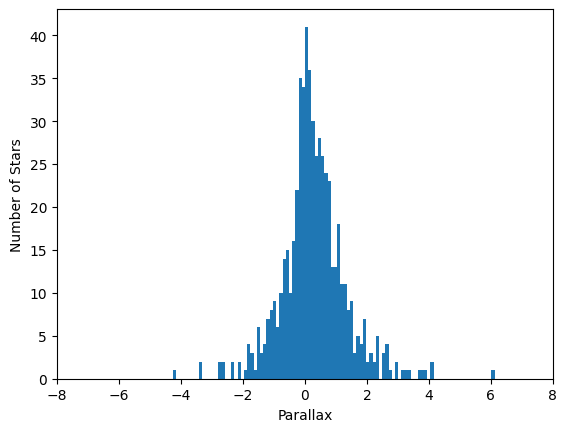

In [44]:
### Here, plot the parallax as a histogram with 1000 bins.

plt.hist(search['parallax'],
         bins=100)

plt.xlabel('Parallax')
plt.ylabel("Number of Stars")

plt.xlim(-8,8)
plt.show()

Looking at the parallax histogram by eye...

Between what range do most of the parallaxes fall on the histogram? What is roughly the maximum of this range? What is the minimum?

You could choose to be generous or more strict with these choices.

In [45]:
min_range = -3
max_range = 3

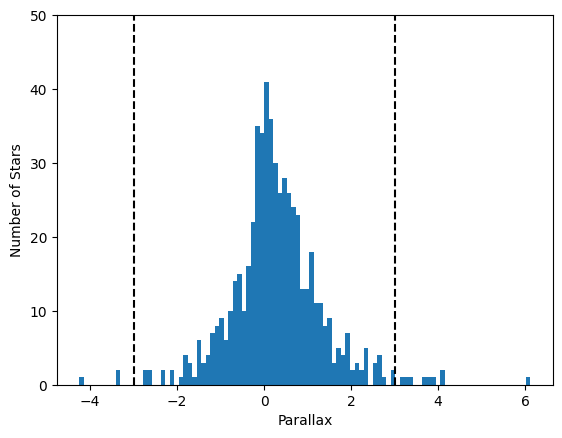

In [46]:
### Here, we are plotting the parallax as a histogram again.

plt.hist(search['parallax'],
         bins=100)

plt.xlabel('Parallax')
plt.ylabel("Number of Stars")



### Here, we add vertical lines on the histogram to represent our cut range
plt.vlines(x = min_range,
           ymin=0,ymax=50,color='k',linestyle='--')
plt.vlines(x = max_range,
           ymin=0,ymax=50,color='k',linestyle='--')

plt.ylim(0,50)
plt.show()


plt.show()

Looking at the parallax histogram from a more quantitative approach...

Use the np.mean() and the np.std() functions to find the average and standard deviation of the parallax data:

In [47]:
average_parallax = np.mean(search['parallax'])
std_parallax = np.std(search['parallax'])

print("The average parallax of the globular cluster is",average_parallax)
print("The parallax standard deviation of the globular cluster is",std_parallax)

The average parallax of the globular cluster is 0.27821638259305753
The parallax standard deviation of the globular cluster is 1.057941974294943


We can use this information to actually choose which data points we want to keep: the stars we think are part of the cluster.

Using 3-5 times the standard deviation and the formula below, we will identify the lower and upper limits:
$$^{\textrm{upper}}_{\textrm{lower}}\textrm{limit} = \textrm{average}\ \pm\ N\times\textrm{standard_deviation}$$

where *N* is the number between 3 and 5.

In [48]:
### We want data within 3 to 5 times the standard deviations from the mean.
lowerlimit = average_parallax - 2 * std_parallax
upperlimit = average_parallax + 2 * std_parallax

Let's compare this quantitative cut to the cut we made by eye.


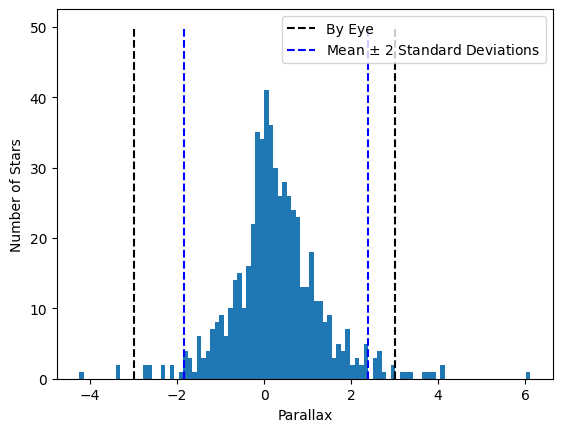

In [49]:
### Here, we are plotting the parallax as a histogram again.

plt.hist(search['parallax'],
         bins=100)

plt.xlabel('Parallax')
plt.ylabel("Number of Stars")


### Here, we add vertical lines on the histogram for the cut by eye

plt.vlines(x = min_range,
           ymin=0,ymax=50,color='k',linestyle='--', label='By Eye')
plt.vlines(x = max_range,
           ymin=0,ymax=50,color='k',linestyle='--')


### Here, we add vertical lines on the histogram for the quantitative cut

plt.vlines(x = lowerlimit,
           ymin=0,ymax=50,color='b',linestyle='--', label='Mean $\pm$ 2 Standard Deviations')
plt.vlines(x = upperlimit,
           ymin=0,ymax=50,color='b',linestyle='--')



plt.legend()
plt.show()

Which do you want to use? The cut by eye or the quantitative cut?

In [50]:
cut_up_lim = upperlimit
cut_low_lim = lowerlimit

Now that we will have cleaned data we will name our data 'cleaned'. We want the cleaned data to be the same as what we called 'search' before but with parallax within our cut range.

We want to get the search data whose parallax is below (<=) the upper limit and above (>=) the lower limit...

In [51]:
search_parallax = search['parallax']

up_cut = search_parallax <= cut_up_lim
low_cut = search_parallax >= cut_low_lim

cleaned = search[(up_cut) & (low_cut)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


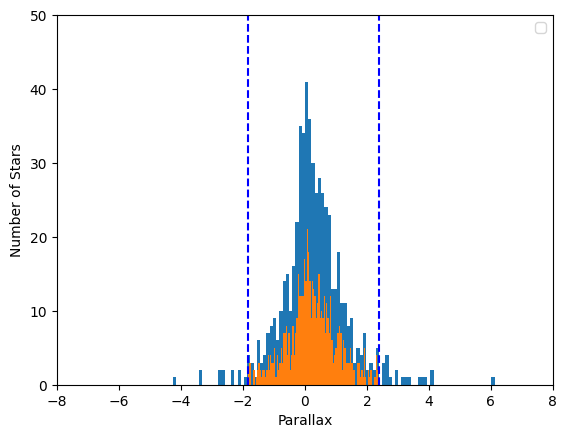

In [52]:
### Now we can plot again to see the cut we made


### Here, we are plotting the original parallax as a histogram again.

plt.hist(search['parallax'],
         bins=100)

### Here, we are plotting the cleaned parallax as a histogram again.

plt.hist(cleaned['parallax'],
         bins=100)

plt.xlabel('Parallax')
plt.ylabel("Number of Stars")

plt.xlim(-8,8)
plt.ylim(0,50)

### Here, we add vertical lines on the histogram for the cut

plt.vlines(x = cut_low_lim,
           ymin=0,ymax=50,color='b',linestyle='--')
plt.vlines(x = cut_up_lim,
           ymin=0,ymax=50,color='b',linestyle='--')

plt.legend()
plt.show()

We have selected stars that have parallax (i.e. distance) similar to the globular cluster!

Now cleaning the proper motions...

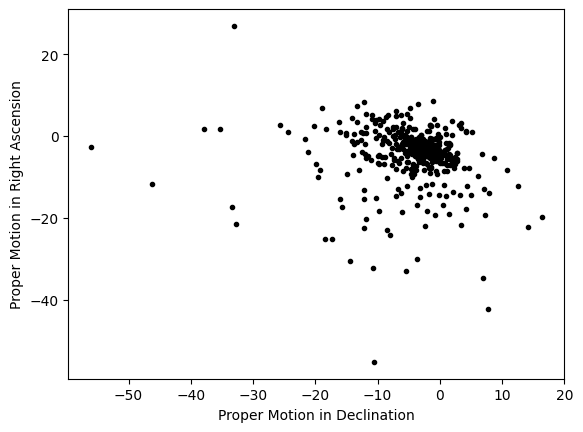

In [53]:
### Here, we make a plot of the proper motion in the declination vs. in the right ascension

plt.plot(cleaned['pmdec'],
         cleaned['pmra'],
         marker='.',linestyle = '',color='k')

plt.xlabel('Proper Motion in Declination')
plt.ylabel('Proper Motion in Right Ascension')

plt.show()

Looking at the proper motion plot by eye...

Between what range do most of the data points fall? What is roughly the maximum of this range on the declination? What is the minimum? How about for the right ascension?

You could choose to be generous or more strict with these choices.

In [54]:
### For the declination...
min_dec_pm_range = -10
max_dec_pm_range = 5

### For the right ascension...
min_ra_pm_range = -15
max_ra_pm_range = 10

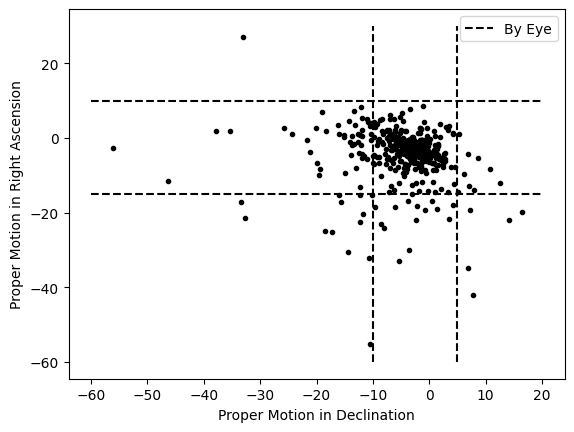

In [55]:
### Here, we make the proper motion plot again
plt.plot(cleaned['pmdec'],
         cleaned['pmra'],
         marker='.',linestyle = '',color='k')

plt.xlabel('Proper Motion in Declination')
plt.ylabel("Proper Motion in Right Ascension")

### Add vertical lines to represent our cut range for the declination proper motion
plt.vlines(x = min_dec_pm_range,
           ymin=-60,ymax=30,color='k',linestyle='--',label='By Eye') # I am drawing a vertical line to show our propermotion limits we made by eye
plt.vlines(x = max_dec_pm_range,
           ymin=-60,ymax=30,color='k',linestyle='--')

### Add horizontal lines to represent our cut range for the right ascension proper motion
plt.hlines(y = min_ra_pm_range,
           xmin=-60,xmax=20,color='k',linestyle='--') # Next we can do horizontal lines
plt.hlines(y = max_ra_pm_range,
           xmin=-60,xmax=20,color='k',linestyle='--')

plt.legend()
plt.show()

Looking at the proper motions from a more quantitative approach...

Use the np.mean() and the np.std() functions to find the average and standard deviation of the proper motion data:

In [56]:
### For the declination...
average_pmdec = np.mean(cleaned['pmdec'])
std_pmdec = np.std(cleaned['pmdec'])

### For the right ascension...
average_pmra = np.mean(cleaned['pmra'])
std_pmra = np.std(cleaned['pmra'])

Again, using 3 to 5 times the standard deviation, we can pick out the data points around the average. Identidy the lower and upper limits using:

$$^{\textrm{upper}}_{\textrm{lower}}\textrm{limit} = \textrm{average}\ \pm\ N\times\textrm{standard_deviation}$$

where *N* is the number between 3 and 5.


In [57]:
### We want data within 3 to 5 times the standard deviations from the mean.

### For the declination...
lowerlimit_dec = average_pmdec - 2 * std_pmdec
upperlimit_dec = average_pmdec + 2 * std_pmdec

### For the right ascension...
lowerlimit_ra = average_pmra - 2 * std_pmra
upperlimit_ra = average_pmra + 2 * std_pmra

Let's compare this quantitative cut to the cut we made by eye.

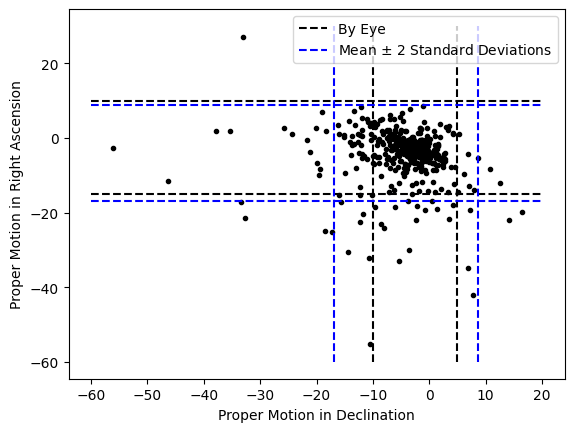

In [58]:
### Here, we make the proper motion plot again
plt.plot(cleaned['pmdec'],
         cleaned['pmra'],
         marker='.',linestyle = '',color='k')

plt.xlabel('Proper Motion in Declination')
plt.ylabel("Proper Motion in Right Ascension")


### Add vertical lines to represent our cut range for the declination proper motion
plt.vlines(x = min_dec_pm_range,
           ymin=-60,ymax=30,color='k',linestyle='--',label='By Eye') # I am drawing a vertical line to show our propermotion limits we made by eye
plt.vlines(x = max_dec_pm_range,
           ymin=-60,ymax=30,color='k',linestyle='--')

### Add horizontal lines to represent our cut range for the right ascension proper motion
plt.hlines(y = min_ra_pm_range,
           xmin=-60,xmax=20,color='k',linestyle='--') # Next we can do horizontal lines
plt.hlines(y = max_ra_pm_range,
           xmin=-60,xmax=20,color='k',linestyle='--')


### Add vertical lines for the quantitative cut in the declination proper motion
plt.vlines(x = lowerlimit_dec,
           ymin=-60,ymax=30,color='b',linestyle='--',label='Mean $\pm$ 2 Standard Deviations') # I am drawing a vertical line to show our propermotion limits we made by eye
plt.vlines(x = upperlimit_dec,
           ymin=-60,ymax=30,color='b',linestyle='--')

### Add horizontal lines for the quantitative cut in the right ascension proper motion
plt.hlines(y = lowerlimit_ra,
           xmin=-60,xmax=20,color='b',linestyle='--') # Next we can do horizontal lines
plt.hlines(y = upperlimit_ra,
           xmin=-60,xmax=20,color='b',linestyle='--')

plt.legend()
plt.show()

Which do you want to use? The cut by eye or the quantitative cut?

In [59]:
### For the declination...
cut_uplim_dec = upperlimit_dec
cut_lowlim_dec = lowerlimit_dec

### For the right ascension...
cut_uplim_ra = upperlimit_ra
cut_lowlim_ra = lowerlimit_ra

Now that we will cut our 'cleaned' data even more using these proper motions cuts.

We want to get the data whose proper motions are below (<=) the upper limits and above (>=) the lower limits...

In [60]:
### For the declination...
cleaned = cleaned[cleaned['pmdec'] <= cut_uplim_dec]
cleaned = cleaned[cleaned['pmdec'] >= cut_lowlim_dec]

### For the right ascension...
cleaned = cleaned[cleaned['pmra'] <= cut_uplim_ra]
cleaned = cleaned[cleaned['pmra'] >= cut_lowlim_ra]

Now let's compare this final cleaned data to our original search data...

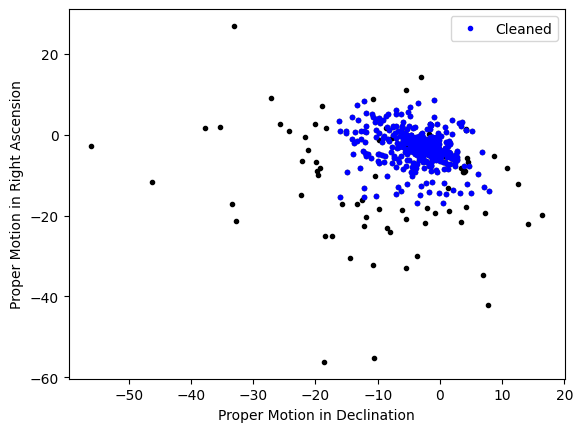

In [61]:
### Here we plot the proper motions from the 'search' data
plt.plot(search['pmdec'],
         search['pmra'],
         marker='.',linestyle = '',color='k')

### Here we plot the proper motions from the 'cleaned' data
plt.plot(cleaned['pmdec'],
         cleaned['pmra'],
         marker='.',linestyle = '',color='b',label='Cleaned')

plt.xlabel('Proper Motion in Declination')
plt.ylabel("Proper Motion in Right Ascension")

plt.legend()
plt.show()

Now you have your set of cleaned data, meaning you are more confident that your data only includes stars that are in the cluster you selected. Next we estimate the age, but first some introduction on how that is done!

### Make your HR Diagram

In this section, you will make an HR diagram for your globular cluster and locate its turnoff point.

For your HR diagram, the Y axis will be measures apparent magnitude - this is the intrinsic brightness of the stars - and the X axis will be the colour - specifically, what we call the G-R colour.

Using the numpy log function (np.log10), find the brightness (also known as absolute magnitude, *M*) of the stars using their apparent magnitude (*m*) and the parallax (*p*) by employing this formula:

$$M = m - 5\times\log\left({\frac{100}{p}}\right)$$

Recall the ```get_mag_plx_color``` function from above:


```
apparent_magnitude, parallax, colour = get_mag_plx_color(catalog)
```

Call this function with the 'cleaned' data catalog to yield the apparent magnitude (m), parallax (p) and colour:

In [62]:
m, p, colour = get_mag_plx_color(cleaned)

Recall the function for the absolute magnitude ```abs_mag```.
Write your own formula like this either by defining a function or assigning a variable to yield the absolute magnitude (M) from the  apparent magnitude (m) and parallax (p):

In [63]:
M = m-5*np.log10(100/p)

/tmp/ipykernel_41803/1607923811.py:1: RuntimeWarning: invalid value encountered in log10
  M = m-5*np.log10(100/p)


Plot the HR diagram:

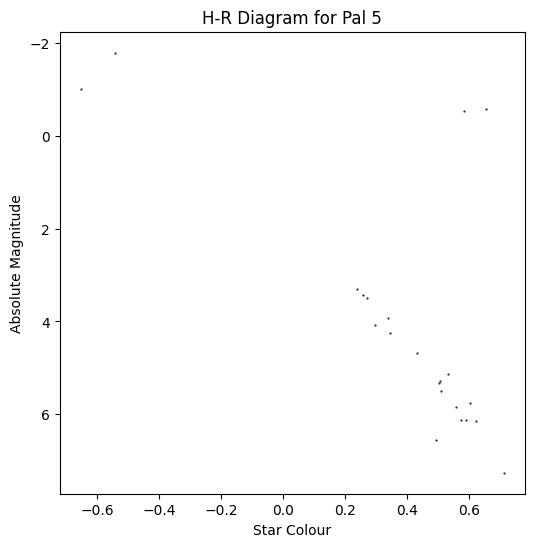

In [64]:
plt.figure(figsize=(6,6), dpi=100) #creates the figure, sets the size and the quality

### Plotting the absolute magnitude vs. the colour
plt.plot(colour,
         M,
         color = 'black', linestyle = '', marker = '.', markersize = 1)

plt.xlabel('Star Colour')
plt.ylabel('Absolute Magnitude')
plt.title('H-R Diagram for Pal 5')

plt.gca().invert_yaxis()  # this inverts the y axis
plt.show()

### Where is the turnoff point on your HR Diagram?

Can you find the turnoff point of the globular cluster on your HR diagram? If you are having trouble finding it, try this:
 - if there are **too few points**, go back to where you query the data and make the the box you're looking within bigger by **increasing the height and width** or be less strict when you are cleaning your data.
 - if there are **too many points**, go back to where you query the data and make the the box you're looking within smaller by **decreasing the height and width** or be more strict when you are cleaning your data.

After examining this H-R diagram by eye, where does the turn off point seem to be? What are the approximate colour and magnitude values of this point?

In [65]:
TurnOff_colour = -0.4
TurnOff_absM = -1

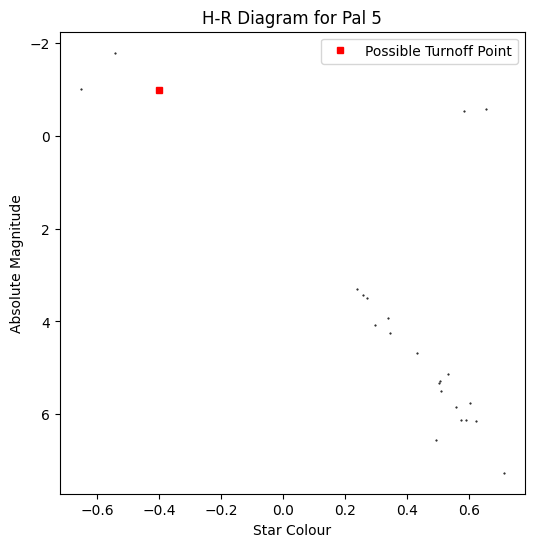

In [66]:
plt.figure(figsize=(6,6), dpi=100) #creates the figure, sets the size and the quality

### Plotting the absolute magnitude vs. the colour
plt.plot(colour,
         M,
         color = 'black', linestyle = '', marker = '.', markersize = 1)

plt.xlabel('Star Colour')
plt.ylabel('Absolute Magnitude')
plt.title('H-R Diagram for Pal 5')

### Plot the approximate turn off point
plt.plot(TurnOff_colour,
         TurnOff_absM,
         marker='s',color='r',ms='5',linestyle='',label='Possible Turnoff Point')

plt.legend()
plt.gca().invert_yaxis()  # this inverts the y axis
plt.show()


### Match Your Turnoff Point to a Star Classification
Match the turnoff point you found above to its corresponding stellar classification from Table 2.

---
*Recall Table 2*:

| Spectral Class     | Apparent Colour      | G-R Colour	     | Luminosity*	| Temperature**	     | Turnoff Age	     |
|----------|-----------|-----------|------|---------|-----------|
| O | Blue          | -1.0 to -0.5  | > 30,000      | > 30,000      | < 40 million years |
| B | Light Blue    | -0.5 to -0.3  | 25,000–30,000 | 10,000–30,000 | 40 million–2.3 billion years |
| A | White         | -0.2 to 0.2   | 5-25          | 7,500–10,000  | 2.3–5.1 billion years |
| F | Light Yellow  | 0.2 to 0.3    | 1.5-5         | 6,000–7,500   | 5.1–9.3 billion years |
| G | Yellow        | 0.3 to 0.6    | 0.6-1.5       | 5,200–6,000   | 9.3–15.6 billion years |
| K | Orange        | 0.6 to 1.4    | 0.08-0.6      | 3,700–5,200   | 15.6–49.4 billion years |
| M | Red           | 1.4 to 2.0    | < 0.08        | 2,400–3,700   | >49.4 billion years |

**Table (2)**. Characteristics of stars in the seven spectral classes. Credit: Carmichael, Romanowsky, & Brodie (2020).

\*The number of times brighter than the Sun.
\**In degrees Kelvin (= Celsius + 273)

---


From the H-R Diagram for globular cluster Pal 5, what was the colour at the possible turn-off point? Find the matching colour in Table 2 under the G-R Colour in Table 2. Follow across that row to get the Turnoff Age.

What is the maximum possible turnoff age of this cluster from the table?

In [67]:
max_age_Pal5 = 2.3 # in units of billion years

---
---

# What is the age of the universe?

In [68]:
print('Age of M22', max_age_M22)
print('Age of M92', max_age_M92)
print('Age of Pal 5', max_age_Pal5)

Age of M22 5.1
Age of M92 5.1
Age of Pal 5 2.3


From the ages of these globular clusters, what can you say about the age of the universe? Have they given you a concrete answer about the age?

In [69]:
age_of_universe = 5.1 #billion years